In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Line

In [59]:
import os
os.getcwd()
os.chdir(r'/Users/ahsan/Documents/Study/Course/Python for Data Science Course Materials/Project/brazilian-ecommerce')


In [7]:
#DATA INGESTION
!ls


olist_customers_dataset.csv           olist_orders_dataset.csv
olist_geolocation_dataset.csv         olist_products_dataset.csv
olist_order_items_dataset.csv         olist_sellers_dataset.csv
olist_order_payments_dataset.csv      product_category_name_translation.csv
olist_order_reviews_dataset.csv


In [8]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation =  pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')


In [9]:
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
category_name_translation = pd.read_csv('product_category_name_translation.csv')


In [10]:
print('-------------------Customers--------------------------')
print(customers.columns)
print('----------------------Order_Items-----------------------')
print(order_items.columns)
print('---------------------Order_Payments------------------------')
print(order_payments.columns)
print('------------------------Orders---------------------')
print(orders.columns)
print('----------------------Products-----------------------')
print(products.columns)
print('---------------------------------------------')

-------------------Customers--------------------------
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
----------------------Order_Items-----------------------
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
---------------------Order_Payments------------------------
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
------------------------Orders---------------------
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
----------------------Products-----------------------
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'prod

In [11]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [13]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [18]:
category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [19]:
print('-------------------Customers--------------------------')
print(customers.columns)
print('----------------------Order_Items-----------------------')
print(order_items.columns)
print('---------------------Order_Payments------------------------')
print(order_payments.columns)
print('------------------------Orders---------------------')
print(orders.columns)
print('----------------------Products-----------------------')
print(products.columns)
print('---------------------------------------------')

-------------------Customers--------------------------
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
----------------------Order_Items-----------------------
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
---------------------Order_Payments------------------------
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
------------------------Orders---------------------
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
----------------------Products-----------------------
Index(['product_id', 'product_category_name', 'product_name_lenght',
       'prod

In [20]:
final_products = pd.merge(order_items,products, on = 'product_id')

In [21]:
print(final_products.columns)
final_products.head()


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [22]:
#final_products = final_products[['price', 'freight_value', 'product_name_length', 'product_weight_g','product_length_cm','product_height_cm','product_width_cm']]

final_data = final_products[['price','freight_value','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]

print(len(final_data))
final_data.head()


112650


,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,58.9,13.29,650.0,28.0,9.0,14.0
1,55.9,17.96,650.0,28.0,9.0,14.0
2,64.9,18.33,650.0,28.0,9.0,14.0
3,58.9,16.17,650.0,28.0,9.0,14.0
4,58.9,13.29,650.0,28.0,9.0,14.0


In [23]:
#Dropping all the null values
final_data.isnull().any().any()
final_data = final_data.dropna()
final_data.isnull().any().any()

False

In [24]:
print(len(final_data))

112632


In [25]:
final_data.head(10)

,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,58.9,13.29,650.0,28.0,9.0,14.0
1,55.9,17.96,650.0,28.0,9.0,14.0
2,64.9,18.33,650.0,28.0,9.0,14.0
3,58.9,16.17,650.0,28.0,9.0,14.0
4,58.9,13.29,650.0,28.0,9.0,14.0
5,55.9,26.93,650.0,28.0,9.0,14.0
6,64.9,38.50,650.0,28.0,9.0,14.0
7,58.9,18.12,650.0,28.0,9.0,14.0
8,55.9,35.71,650.0,28.0,9.0,14.0
9,239.9,19.93,30000.0,50.0,30.0,40.0


In [26]:
final_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,112632.0,120.650851,183.565939,0.85,39.90,74.99,134.90,6735.00
freight_value,112632.0,19.991071,15.807467,0.00,13.08,16.26,21.15,409.68
product_weight_g,112632.0,2093.672047,3751.596884,0.00,300.00,700.00,1800.00,40425.00
product_length_cm,112632.0,30.153669,16.153449,7.00,18.00,25.00,38.00,105.00
product_height_cm,112632.0,16.593766,13.443483,2.00,8.00,13.00,20.00,105.00
product_width_cm,112632.0,22.996546,11.707268,6.00,15.00,20.00,30.00,118.00


In [27]:
final_data['product_weight_g'] = final_data['product_weight_g'] / 1000

In [28]:
final_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,112632.0,120.650851,183.565939,0.85,39.90,74.99,134.90,6735.000
freight_value,112632.0,19.991071,15.807467,0.00,13.08,16.26,21.15,409.680
product_weight_g,112632.0,2.093672,3.751597,0.00,0.30,0.70,1.80,40.425
product_length_cm,112632.0,30.153669,16.153449,7.00,18.00,25.00,38.00,105.000
product_height_cm,112632.0,16.593766,13.443483,2.00,8.00,13.00,20.00,105.000
product_width_cm,112632.0,22.996546,11.707268,6.00,15.00,20.00,30.00,118.000


In [40]:
final_data.columns

Index(['price', 'freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [45]:
features = ['freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm']

In [46]:
for f in features:
    related = final_data['price'].corr(final_data[f])
    print('%s: %f' %(f,related))

freight_value: 0.414333
product_weight_g: 0.338819
product_length_cm: 0.145811
product_height_cm: 0.223602
product_width_cm: 0.172467


In [50]:
# Also plotting the heat map
corr = final_data.corr()
corr

,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
price,1.000000,0.414333,0.338819,0.145811,0.223602,0.172467
freight_value,0.414333,1.000000,0.610420,0.309086,0.391831,0.323777
product_weight_g,0.338819,0.610420,1.000000,0.460919,0.583277,0.506609
product_length_cm,0.145811,0.309086,0.460919,1.000000,0.192895,0.532537
product_height_cm,0.223602,0.391831,0.583277,0.192895,1.000000,0.281224
product_width_cm,0.172467,0.323777,0.506609,0.532537,0.281224,1.000000


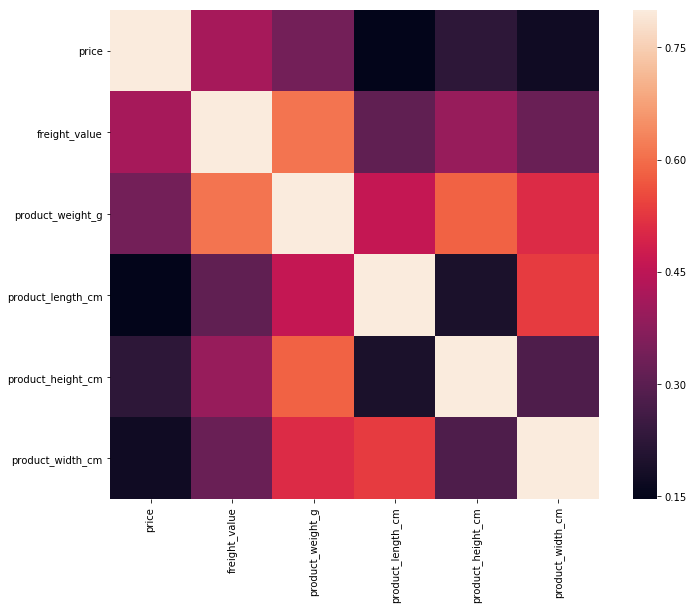

In [53]:
f, ax = plt.subplots(figsize =(12,9))
sns.heatmap(corr, vmax=.8, square=True)

In [54]:
final_data.columns

Index(['price', 'freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [56]:
final_data = final_data[['price','freight_value','product_weight_g','product_height_cm']]

In [57]:
final_data.head()

,price,freight_value,product_weight_g,product_height_cm
0,58.9,13.29,0.65,9.0
1,55.9,17.96,0.65,9.0
2,64.9,18.33,0.65,9.0
3,58.9,16.17,0.65,9.0
4,58.9,13.29,0.65,9.0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(final_data[['freight_value','product_weight_g','product_height_cm']], final_data[['price']], test_size=0.33, random_state=42)

In [63]:
print(len(X_train),len(y_train))

75463 75463
